In [1]:
from src.utils import download_images

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
first_500_rows = df.head(500)
print(first_500_rows)

                                            image_link  group_id  entity_name  \
0    https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1    https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2    https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3    https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4    https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   
..                                                 ...       ...          ...   
495  https://m.media-amazon.com/images/I/7179JK26-1...    893692  item_weight   
496  https://m.media-amazon.com/images/I/719skH5g3D...    299791  item_weight   
497  https://m.media-amazon.com/images/I/81L5nXqWeL...    731432  item_weight   
498  https://m.media-amazon.com/images/I/61m-jQu+Za...    558832  item_weight   
499  https://m.media-amazon.com/images/I/71yqw2dcvC...    601746  item_weight   

           entity_value  
0

In [3]:
first_500_rows.columns

Index(['image_link', 'group_id', 'entity_name', 'entity_value'], dtype='object')

In [4]:
first_500_rows['image_link'][0]

'https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg'

In [9]:
download_images([first_500_rows['image_link'][0]], ".",True)

Exception in thread Thread-24 (_handle_workers):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\pool.py", line 522, in _handle_workers
    cls._wait_for_updates(current_sentinels, change_notifier)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\

: 

: 

In [6]:
first_500_rows.head(1)

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram


In [7]:
import cv2

In [8]:
img_arr = cv2.imread('61I9XdN6OFL.jpg')

In [9]:
import pytesseract

In [12]:
oem = 3
psm = 11

config=f'--oem {oem} --psm {psm}'

In [13]:
pytesseract.image_to_string(img_arr, config=config)

'ah\n\nN\n\nROPES &\n\nINGREDIENT MENAGER\n\n100% NATUREL\n\n(605\n'

In [15]:
import cv2
gray = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [16]:
import matplotlib.pyplot as plt
import numpy as np

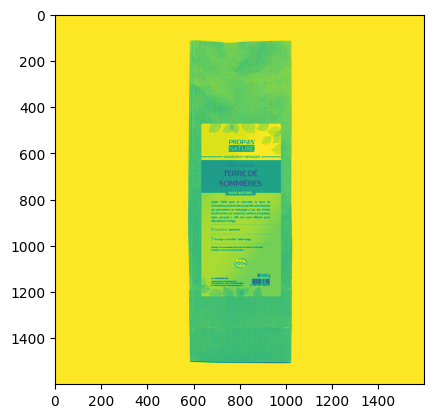

In [18]:
plt.imshow(gray)
plt.show()

In [22]:
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


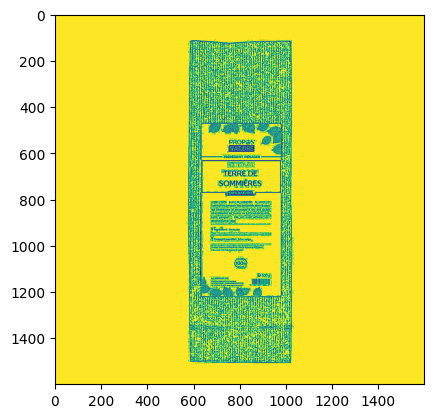

In [23]:
plt.imshow(binary)
plt.show()

In [24]:
noise_free = cv2.medianBlur(binary, 3)


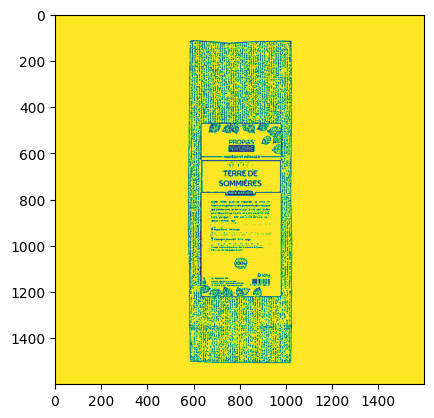

In [26]:
plt.imshow(noise_free)
plt.show()

In [27]:
kernel = np.ones((1,1), np.uint8)
dilated = cv2.dilate(noise_free, kernel, iterations=1)


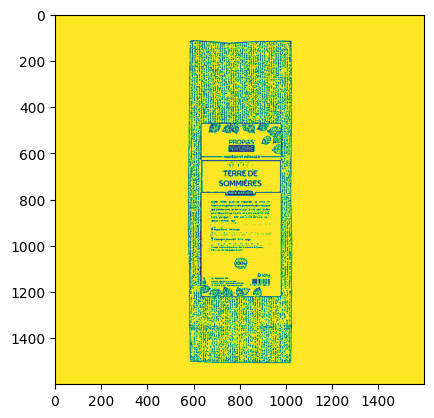

In [28]:
plt.imshow(dilated)
plt.show()

In [29]:
coords = np.column_stack(np.where(binary > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle
(h, w) = binary.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(binary, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)


In [ ]:
import cv2
import numpy as np

# Function to preprocess an image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Otsu's thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Remove noise with median blur
    noise_free = cv2.medianBlur(binary, 3)
    
    # Resize image to enhance text
    resized = cv2.resize(noise_free, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    
    return resized

# Array to store processed images
processed_images = []

# Loop over image indices
for i in range(1, 11):
    image_path = f"image{i}.jpg"
    processed_image = preprocess_image(image_path)
    processed_images.append(processed_image)
    # Optional: Save processed images
    cv2.imwrite(f"processed_image{i}.jpg", processed_image)

# Print a message when done
print("Preprocessing completed for 10 images.")


In [30]:
df = pd.read_csv('test.csv')
df.columns

Index(['index', 'image_link', 'group_id', 'entity_name'], dtype='object')

In [ ]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# Function to display multiple images in a grid
def display_images(images, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns
    fig.suptitle(title, fontsize=16)
    
    for i, img in enumerate(images):
        ax = axes[i // 5, i % 5]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(f'Image {i+1}')
    
    plt.tight_layout()
    plt.show()

# Initialize an array to store the images
images = []

# Define the number of images (10 in this case)
num_images = 10

# Path where the images are stored
image_paths = [f'image_{i+1}.png' for i in range(num_images)]  # Assuming image_1.png, image_2.png, ...

# Read and display original images
original_images = [cv2.imread(path) for path in image_paths]
display_images(original_images, "Original Images")

# Convert to grayscale and display
gray_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in original_images]
display_images(gray_images, "Grayscale Images")

# Apply Otsu's Binarization and display
binary_images = [cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1] for gray in gray_images]
display_images(binary_images, "Binarized Images (Otsu's)")

# Perform OCR on each preprocessed image and store the results
ocr_results = []
for img in binary_images:
    text = pytesseract.image_to_string(img)
    ocr_results.append(text)

# Output OCR results for each image
for idx, text in enumerate(ocr_results):
    print(f"Text from image {idx+1}:\n{text}\n")
